In [41]:
import vowpal_wabbit_next as vw
import random
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import json
from collections import defaultdict  

from typing import List, Tuple

In [30]:
# read from json file 
profanity = pd.read_json('profanity_dataset.json')

In [27]:
profanity.head()

,worker_id,task_id,task_response_id,Profanity,Canonical Form 1,Canonical Form 2,Canonical Form 3,Category 1,Category 2,Category 3,Severity Rating,Severity Description
0,APKAYMEPJ3TR,dc61ccb0-c79e-4d55-a1ac-2986d06c9d33,19852156-440b-453e-acc7-a874fc578d52,tossing salad,tossing salad,,,sexual anatomy / sexual acts,none,none,1.8,Strong
1,4TG67HVWJNDP,3fe0663b-5912-4887-ba40-0c9ce23499a9,04d14ffa-30e8-471e-b139-aef29b4bc35e,tranny,tranny,,,sexual orientation / gender,none,none,2.8,Severe
2,KKGQRZWNCHJK,afe1bb56-f241-4d36-a7fd-2e08166adfb8,3cf4642c-e952-4142-a912-c166c9c6a03d,suck my d,dick,,,sexual anatomy / sexual acts,none,none,1.8,Strong
3,JW992R3C66V9,7540dddf-1189-4deb-b0d8-dc5cc406fa89,954f37c9-a747-46bc-952e-e1b9ba47238f,throater,throater,,,sexual anatomy / sexual acts,none,none,2.4,Strong
4,KKGQRZWNCHJK,6154f256-2e6e-44fa-9ec4-9b78a33b502d,9f01d585-5277-4040-a862-8bc8ad22f84d,wank3rs,wank,,,sexual anatomy / sexual acts,other / general insult,none,1.0,Mild


In [7]:
profanity['Severity Description'].value_counts()

Severity Description
Strong    713
Severe    463
Mild      422
Name: count, dtype: int64

<Axes: xlabel='Severity Description'>

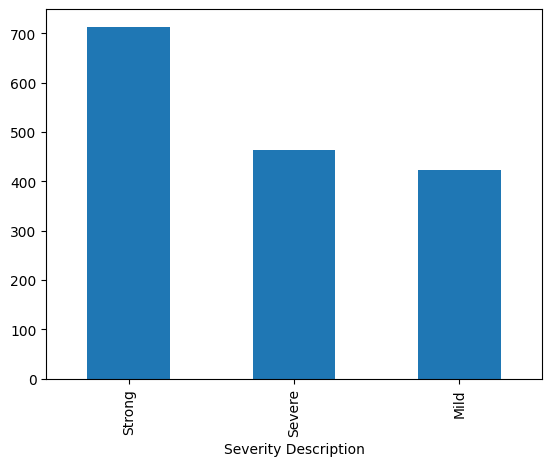

In [8]:
profanity['Severity Description'].value_counts().plot(kind='bar')

In [9]:
def parse_lines(parser: vw.TextFormatParser, input_str: str) -> List[vw.Example]:
    return [parser.parse_line(line) for line in input_str.split("\n")]

In [10]:
profanity.head(1)

,worker_id,task_id,task_response_id,Profanity,Canonical Form 1,Canonical Form 2,Canonical Form 3,Category 1,Category 2,Category 3,Severity Rating,Severity Description
0,APKAYMEPJ3TR,dc61ccb0-c79e-4d55-a1ac-2986d06c9d33,19852156-440b-453e-acc7-a874fc578d52,tossing salad,tossing salad,,,sexual anatomy / sexual acts,none,none,1.8,Strong


In [11]:
first_object = profanity.iloc[0] # get first object
print(first_object['Severity Description'])


Strong


In [12]:
# example 
{
	"worker_id": "FDMQXAZTF74K",
	"task_id": "7a610dbd-729e-4a47-b9b9-7baa2455dd68",
	"task_response_id": "354c6a31-9a44-4330-8336-ebe6d11f8a33",
	"Profanity": "69",
	"Canonical Form 1": "69",
	"Canonical Form 2": "",
	"Canonical Form 3": "",
	"Category 1": "sexual anatomy / sexual acts",
	"Category 2": "none",
	"Category 3": "none",
	"Severity Rating": "1",
	"Severity Description": "Mild"
}

{'worker_id': 'FDMQXAZTF74K',
 'task_id': '7a610dbd-729e-4a47-b9b9-7baa2455dd68',
 'task_response_id': '354c6a31-9a44-4330-8336-ebe6d11f8a33',
 'Profanity': '69',
 'Canonical Form 1': '69',
 'Canonical Form 2': '',
 'Canonical Form 3': '',
 'Category 1': 'sexual anatomy / sexual acts',
 'Category 2': 'none',
 'Category 3': 'none',
 'Severity Rating': '1',
 'Severity Description': 'Mild'}

In [13]:
# format example 
def convert_to_vw_format(data):
    # Extracting the label
    # label = data.get("Profanity", "")
    label = 1 # since they are all profanities
    
    # Extracting the tag (using task_response_id as the unique identifier)
    # tag = data.get("task_response_id", "") # not sure if this is necessary
    
    # Constructing the features string
    features = []
    namespaces = ["Profanity", "Canonical Form 1", "Canonical Form 2", "Canonical Form 3", 
                  "Category 1", "Category 2", "Category 3", "Severity Rating", "Severity Description"]
    for namespace in namespaces:
        value = data.get(namespace, "")
        if value:
            features.append(f"{namespace.replace(' ', '_')}:{value} | ")
    
    # Constructing the final VW string
    vw_string = f"{label} | {' '.join(features)}"
    
    return vw_string

In [16]:
# print(convert_to_vw_format(data))

In [17]:
# read from json file each object
def read_json_file(file_path: str) -> List[dict]:
    with open(file_path, "r") as f:
        return [json.loads(line) for line in f.readlines()]

In [29]:
# read_json_file('profanity_dataset.json')

In [64]:
import json

def convert_objects_from_json_file_to_vw(filename):
    with open(filename, 'r') as file:
        data = json.load(file)
        
        # Ensure the file contains a list of objects
        if not isinstance(data, list):
            print("The JSON file does not contain a list of objects.")
            return
        
        for idx, obj in enumerate(data, start=1):
            # print(f"Object {idx}:")
            # print(json.dumps(obj, indent=4))
            # print('-' * 50)  # Separator
            convert_to_vw_format(obj)
            # print(convert_to_vw_format(obj))
            


In [63]:
# Test
filename = "profanity_dataset.json"
convert_objects_from_json_file_to_vw(filename)

TypeError: list indices must be integers or slices, not str

In [20]:

workspace = vw.Workspace()

text_parser = vw.TextFormatParser(workspace)

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

filename = "profanity_dataset.json"
with open(filename, 'r') as file:
    data = json.load(file)


# Convert JSON to training data format
chats = [item["Canonical Form 1"] for item in data]
labels = [item["Profanity"] for item in data]

# Feature extraction
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(chats)

# Model training
clf = MultinomialNB()
clf.fit(X_train, labels)

def predict_chat_profanity(incoming_chat):
    chat_features = vectorizer.transform([incoming_chat])
    prediction = clf.predict(chat_features)
    return prediction[0]

# Test
incoming_chat = "fuck this shit"
result = predict_chat_profanity(incoming_chat)
if result == '1':
    print("Profanity detected!")
else:
    print("Chat is clean.")


Chat is clean.


In [57]:

surge_profanity_list = defaultdict(list)

with open("profanity_dataset.json", "r") as json_file:
    data = json.load(json_file)

    for row in data:
        surge_profanity_list[row["Category 1"]].append(row["Profanity"])
        surge_profanity_list[row["Severity Rating"]].append(row["Profanity"])
        if row["Category 2"]:
            surge_profanity_list[row["Category 2"]].append(row["Profanity"])
        if row["Category 3"]:
            surge_profanity_list[row["Category 3"]].append(row["Profanity"])


In [58]:
print(surge_profanity_list)

defaultdict(<class 'list'>, {'sexual anatomy / sexual acts': ['tossing salad', 'suck my d', 'throater', 'wank3rs', 'upskirts', 'whack off', 'twats', 'wang', 'twatzilla', 'wanking', 'tallywacker', 'weenie', 'willy-whacker', 'wanked', 'useless fucker', 'w4nker', 'swine fucker', 'vajayjay', 'twat waffle', 'tits', 'twatt', 'wanks', 'wang wrangler', 'tart', 'tadger', 'tongue fucker', 'w@nkers', 'tongue fucking', 'wankies', 'twa+', 'tickle the pickle', 'wnker', 'vag', 'wanker', 'wankbastard', 'tard asses', 'weiner', 'wise ass', 'wank', 'suck off', 'trousersnake', 'twatface', 'w4nk3r', 'tw@t', 'suck my dick', 'wank off', 'wank3r', 'twattish', 'w@nker', 'trouser snake', 'twat', 'wankers', 'vulva', 'snatch', 'slut hole', 'suck', 'shitfvck', 'shittyfuckface', 'shittydick', 'shitfucks', 'shitheadfucker', 'shitheadfuckface', 'shlong', 'shittyfuck', 'shitfucker', 'sphincter', 'spanking', 'shitterfucker', 'shitsfuck', 'suck my cock', 'stfu', 'stump chewer', 'sixty-nine', 'shithole', 'shytfeisterfuck

In [69]:
# from collections import defaultdict

# Categorized profanities
# PROFANITIES = defaultdict(list)

# PROFANITIES["racial_slurs"] = ["badword1", "badword2"]
# PROFANITIES["sexual_content"] = ["badword3", "badword4"]
# PROFANITIES["violent_terms"] = ["badword5", "badword6"]

def preprocess_text(text):
    """
    Convert text to lowercase and remove punctuation.
    """
    text = text.lower()
    for punct in '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~':
        text = text.replace(punct, '')
    return text

def detect_profanity_category(text):
    """
    Detect the category of profanity in the text, if any.
    """
    tokens = preprocess_text(text).split()
    for category, words in surge_profanity_list.items():
        for token in tokens:
            if token in words:
                return category
    return None

def filter_profanity(text):
    """
    Replace profane words in the text with asterisks.
    """
    tokens = preprocess_text(text).split()
    filtered_tokens = []

    for token in tokens:
        is_profanity = any(token in words for words in surge_profanity_list.values())
        filtered_tokens.append(token if not is_profanity else '*'*len(token))

    return ' '.join(filtered_tokens)




No profanity detected!


In [71]:


def get_profanities(message):
    category = detect_profanity_category(message)
    if category:
        print(f"Profanity detected of category: {category}!")
        print("Filtered message:", filter_profanity(message))
    else:
        print("No profanity detected!")


No profanity detected!


In [84]:
        
# Test the functions
message0 = "This message contains badword3 inside."
message1 = "This message is clean."
message2 = "This message contains bitch and fuck inside."

get_profanities(message0)


No profanity detected!


In [85]:
get_profanities(message1)

No profanity detected!


In [86]:

get_profanities(message2)


Profanity detected of category: sexual anatomy / sexual acts!
Filtered message: this message contains ***** and **** inside


In [87]:
get_profanities(message3)

Profanity detected of category: none!
Filtered message: ****** ******


In [88]:
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report




               precision    recall  f1-score   support

      neutral       0.00      0.00      0.00       0.0
 racial_slurs       0.00      0.00      0.00       2.0
violent_terms       0.00      0.00      0.00       0.0

     accuracy                           0.00       2.0
    macro avg       0.00      0.00      0.00       2.0
 weighted avg       0.00      0.00      0.00       2.0

Message: 'This is a test message with badword4.' is categorized as: sexual_content


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_cla

In [95]:


# Generate a toy dataset for training. In real-world, you'd have a much larger dataset
texts = [
    "This is a neutral text.",
    "This contains badword1.",
    "This one has fuck badword3.",
    "Here is badword5.",
    "Just another neutral text.",
    "badword2 is here.",
    "badword4 detected.",
    "Finally, a text with badword6."
]

labels = [
    "neutral",
    "racial_slurs",
    "sexual_content",
    "violent_terms",
    "neutral",
    "racial_slurs",
    "sexual_content",
    "violent_terms"
]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Create a pipeline that transforms the data and then classifies it
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)

# Evaluate on the test set
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Classify a new message
message = "This is a test message with."
print(f"Message: '{message}' is categorized as:", model.predict([message])[0])

               precision    recall  f1-score   support

      neutral       0.00      0.00      0.00       0.0
 racial_slurs       0.00      0.00      0.00       2.0
violent_terms       0.00      0.00      0.00       0.0

     accuracy                           0.00       2.0
    macro avg       0.00      0.00      0.00       2.0
 weighted avg       0.00      0.00      0.00       2.0

Message: 'This is a test message with.' is categorized as: violent_terms


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_cla